# Problem Set 2 - Part 1
### Heather Chen
## 1. Numerical differentiation exercises
### Problem 1

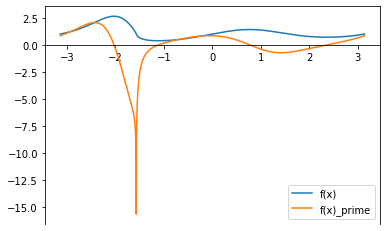

In [13]:
import sympy as sy
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline

#Define fx and its derivative   
x = sy.symbols('x')
f_x = (sy.sin(x)+1)**(sy.sin(sy.cos(x)))
fx_prime = sy.diff(f_x, x)

#Lambdify fx and fx_prime
fx = sy.lambdify(x, f_x)
fxprime = sy.lambdify(x, fx_prime)

#Plot fx and its derivative
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

x_points = np.arange(-math.pi, math.pi, 0.001)
ax.plot(x_points, fx(x_points), label = "f(x)")
ax.plot(x_points, fxprime(x_points), label = "f(x)_prime")
ax.legend()

### Problem 2 

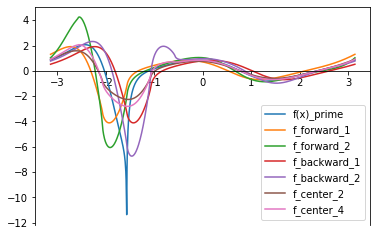

In [3]:
#Define a series of functions, first define former fx as f for simplicity
def f_forward1(x, h=0.5):
    return (fx(x+h)-fx(x)) / h
def f_forward2(x, h=0.5):
    return (-3*fx(x)+4*fx(x+h)-fx(x+2*h)) / (2*h)
def f_backward1(x, h=0.5):
    return (fx(x)-fx(x-h)) / h
def f_backward2(x, h=0.5):
    return (3*fx(x)-4*fx(x-h)+fx(x-2*h)) / (2*h)
def f_center2(x, h=0.5):
    return (fx(x+h)-fx(x-h)) / (2*h)
def f_center4(x, h=0.5):
    return (fx(x-2*h)-8*fx(x-h)+8*fx(x+h)-fx(x+2*h)) / (12*h)

#Plot the derivative approximation above and accurate result in problem 1
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

x_points = np.linspace(-math.pi, math.pi, 1000)
#First take h=0.5
ax.plot(x_points, fxprime(x_points), label = "f(x)_prime")
ax.plot(x_points, f_forward1(x_points), label = "f_forward_1")
ax.plot(x_points, f_forward2(x_points), label = "f_forward_2")
ax.plot(x_points, f_backward1(x_points), label = "f_backward_1")
ax.plot(x_points, f_backward2(x_points), label = "f_backward_2")
ax.plot(x_points, f_center2(x_points), label = "f_center_2")
ax.plot(x_points, f_center4(x_points), label = "f_center_4")
ax.legend()

### Problem 3

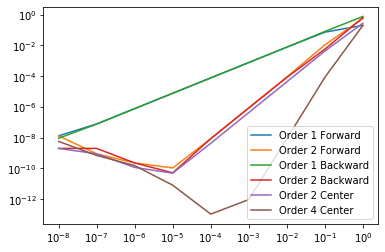

In [4]:
#Define a function to calculate and plot absolute errors
def ab_errors(x):
    ax = plt.gca()
    h_points = np.logspace(-8,0,9)
    ax.loglog(h_points, abs(f_forward1(x, h_points) - fxprime(x)), label = "Order 1 Forward")
    ax.loglog(h_points, abs(f_forward2(x, h_points) - fxprime(x)), label = "Order 2 Forward")
    ax.loglog(h_points, abs(f_backward1(x, h_points) - fxprime(x)), label = "Order 1 Backward")
    ax.loglog(h_points, abs(f_backward2(x, h_points) - fxprime(x)), label = "Order 2 Backward")
    ax.loglog(h_points, abs(f_center2(x, h_points) - fxprime(x)), label = "Order 2 Center")
    ax.loglog(h_points, abs(f_center4(x, h_points) - fxprime(x)), label = "Order 4 Center")
    ax.set_xticks(h_points)
    ax.legend()

ab_errors(1)

### Problem 4

In [5]:
import pandas as pd

#Import current data to a dataframe
pf = pd.DataFrame(data = np.load("plane.npy"), columns=["time","a","b"])

#Convert degrees to radius
pf["rad_a"] = np.deg2rad(pf["a"])
pf["rad_b"] = np.deg2rad(pf["b"])

#Calculate x, y position at time t
pf["x"] = 500*np.tan(pf["rad_b"])/(np.tan(pf["rad_b"])-np.tan(pf["rad_a"]))
pf["y"] = 500*np.tan(pf["rad_b"])*np.tan(pf["rad_a"])/(np.tan(pf["rad_b"])-np.tan(pf["rad_a"]))

vlist = []
#A forward difference quotient for t=7
def v_forward(pf, t):
    x_prime = (-3*pf["x"][t] + 4*pf["x"][t+1] - pf["x"][t+2])/2
    y_prime = (-3*pf["y"][t] + 4*pf["y"][t+1] - pf["y"][t+2])/2
    return math.sqrt(x_prime**2+y_prime**2)

vlist.append(v_forward(pf, 0))

#A centered difference quotient for t=8-13
def v_center(pf, t):
    x_prime = (pf["x"][t+1]-pf["x"][t-1])/2
    y_prime = (pf["y"][t+1]-pf["y"][t-1])/2
    return math.sqrt(x_prime**2+y_prime**2)

for t in range(1,7):
    vlist.append(v_center(pf, t))
    
#A backward difference quotient for t=14
def v_backward(pf, t):
    x_prime = (3*pf["x"][t] - 4*pf["x"][t-1] + pf["x"][t-2])/2
    y_prime = (3*pf["y"][t] - 4*pf["y"][t-1] + pf["y"][t-2])/2
    return math.sqrt(x_prime**2+y_prime**2)

vlist.append(v_backward(pf, 7))

pf["velocity"] = vlist
pf

,time,a,b,rad_a,rad_b,x,y,velocity
0,7.0,56.25,67.54,0.981748,1.178795,1311.271337,1962.456239,45.850552
1,8.0,55.53,66.57,0.969181,1.161866,1355.936476,1975.114505,47.001039
2,9.0,54.80,65.59,0.956440,1.144761,1401.918398,1987.346016,48.998805
3,10.0,54.06,64.59,0.943525,1.127308,1450.497006,2000.840713,50.099442
4,11.0,53.34,63.62,0.930959,1.110378,1498.640350,2013.512411,48.290351
5,12.0,52.69,62.74,0.919614,1.095020,1543.798955,2025.792234,51.564559
6,13.0,51.94,61.72,0.906524,1.077217,1598.041382,2040.990583,53.923034
7,14.0,51.28,60.82,0.895005,1.061509,1647.596093,2055.065571,49.106762


### Problem 5

In [21]:
#Define the function
def high_dim(funcs, x, h):
    func_num = len(funcs)
    dim = len(x)
    Jacobian = np.zeros((func_num, dim))
    variables = set()
    for func in funcs:
        var = func.atoms(sy.Symbol)
        variables = variables.union(var)
    for i, func in enumerate(funcs):
        for j, var in enumerate(variables):
            func_prime = (func.subs(var, var+h) - func.subs(var, var-h))/(2*h)
            funcprime = sy.lambdify(var, func_prime)
            Jacobian[i,j] = funcprime(x[j])
    return Jacobian

In [22]:
x = sy.symbols("x")
y = sy.symbols("y")
f_test = [x**2, x**3-y]
X = [1, 1]
high_dim(f_test, X, 0.01)

array([[ 0.    ,  2.    ],
       [-1.    ,  3.0001]])

### Problem 7

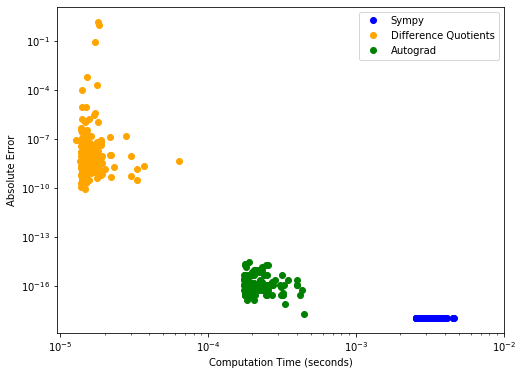

In [14]:
import time
import random
import autograd.numpy as anp
from autograd import grad

def run_plot(N):
    
    time1 = np.zeros(N, dtype="float32")
    time2 = np.zeros(N, dtype="float32")
    time3 = np.zeros(N, dtype="float32")
    error1 = (1e-18)*np.ones(N, dtype="float32")
    error2 = np.zeros(N, dtype="float32")
    error3 = np.zeros(N, dtype="float32")
    grad_prime = grad(lambda x: (anp.sin(x) + 1) ** (anp.sin(anp.cos(x))))
    
    for i in range(N):
        x0 = random.random()*math.pi*2 - math.pi
        
        #Calculate time use Sympy
        begin_time1 = time.time()
        f_prime = sy.diff(f_x, x)
        fprime = sy.lambdify(x, f_prime)
        f_prime1 = fprime(x0)
        end_time1 = time.time()
        time1[i] = end_time1 - begin_time1
        
        #Calculate time and error using difference quotients
        begin_time2 = time.time()
        f_prime2 = f_center4(x0, h=0.01)
        end_time2 = time.time()
        time2[i] = end_time2 - begin_time2
        error2[i] = abs(f_prime1 - f_prime2)
        
        #Calculate derivative using AutoGrad
        begin_time3 = time.time()
        f_prime3 = grad_prime(x0)
        end_time3 = time.time()
        time3[i] = end_time3 - begin_time3
        error3[i] = abs(f_prime1 - f_prime3)
        
    ax = plt.figure(figsize=(8,6)).gca()
    ax.loglog(time1, error1,'ro', label = "Sympy", color = "blue")
    ax.loglog(time2, error2,'ro', label = "Difference Quotients", color = "orange")
    ax.loglog(time3, error3,'ro', label = "Autograd", color = "green")
    plt.xlabel("Computation Time (seconds)")
    plt.ylabel("Absolute Error")
    ax.set_xticks(np.logspace(-5,-2,4))
    ax.legend()

run_plot(200)